In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
data = pd.read_csv("/content/tips.csv")

print(data.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [4]:
numerical_features = ["total_bill", "size"] # Numerical features

categorical_features = [col for col in ["sex", "smoker", "day", "time"] if col in data.columns] # Categorical features

# Define preprocessing steps
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),  # Standardize numerical features
    ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_features)  # One-hot encode categorical features
])



In [5]:
X = data.drop(columns=["tip"])  #features (X)
y = data["tip"]  #variable (y)

In [6]:

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Preprocess the data
X_train = preprocessor.fit_transform(X_train) # Fit and transform on training data
X_test = preprocessor.transform(X_test) # Transform test data using the fitted preprocessor

In [7]:
# Create models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5)
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)  # Training the model
    print(f"{name} model trained successfully!")


Linear Regression model trained successfully!
Ridge Regression model trained successfully!
Lasso Regression model trained successfully!
Decision Tree model trained successfully!


In [9]:
# Function to evaluate a model
def evaluate_model(name, model):
    y_pred = model.predict(X_test)  # Predict test data

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("-" * 40)

# Evaluate all models
for name, model in models.items():
    evaluate_model(name, model)

Model: Linear Regression
MSE: 0.7034
RMSE: 0.8387
MAE: 0.6671
R² Score: 0.4373
----------------------------------------
Model: Ridge Regression
MSE: 0.7007
RMSE: 0.8370
MAE: 0.6669
R² Score: 0.4395
----------------------------------------
Model: Lasso Regression
MSE: 0.6122
RMSE: 0.7824
MAE: 0.6548
R² Score: 0.5102
----------------------------------------
Model: Decision Tree
MSE: 0.8490
RMSE: 0.9214
MAE: 0.6905
R² Score: 0.3208
----------------------------------------


In [10]:
y_pred = model.predict(X_test)  # Predict test data
residuals = y_test - y_pred  # Calculate residuals

print(residuals.head())  # Show some residuals

24     0.257308
6     -0.020000
153   -2.123000
211    2.097500
198    0.083913
Name: tip, dtype: float64


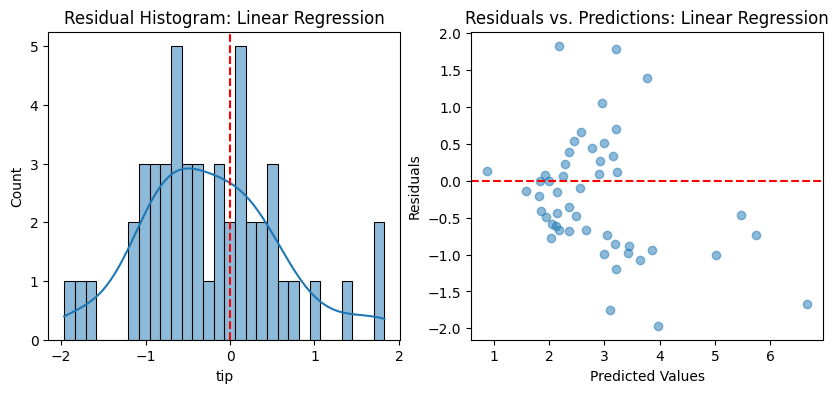

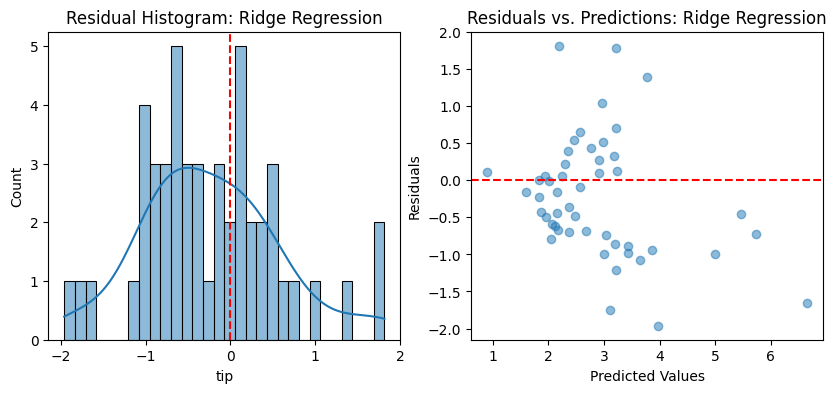

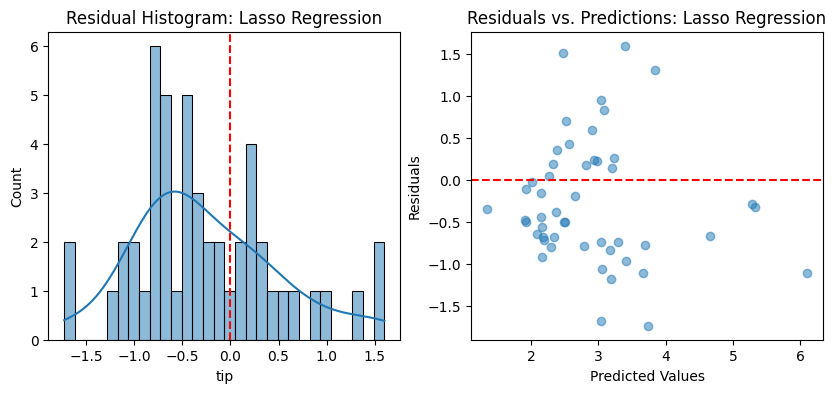

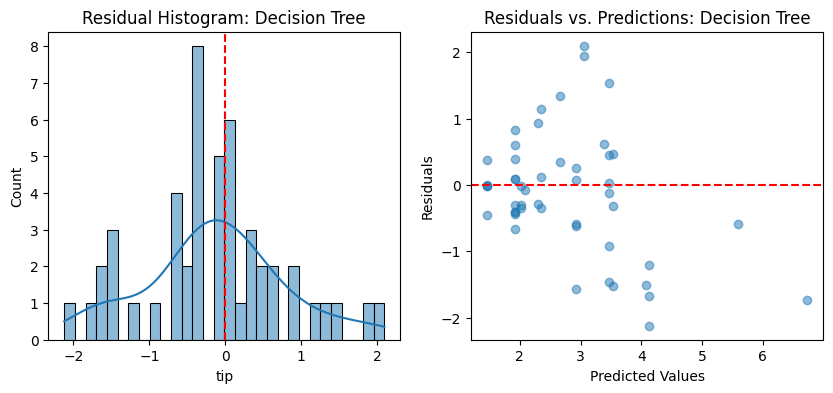

In [11]:
# Function to plot residuals
def plot_residuals(name, model):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred  # Difference between actual and predicted

    plt.figure(figsize=(10, 4))

    # Histogram of residuals
    plt.subplot(1, 2, 1)
    sns.histplot(residuals, bins=30, kde=True)
    plt.axvline(0, color='red', linestyle='dashed')
    plt.title(f"Residual Histogram: {name}")

    # Residuals vs. Predictions plot
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='dashed')
    plt.title(f"Residuals vs. Predictions: {name}")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")

    plt.show()

# Plot residuals for each model
for name, model in models.items():
    plot_residuals(name, model)